## Reading from the STAC API with R

This quickstart introduces STAC for R users. To use the Planetary Computer's STAC API from Python, see [here](https://planetarycomputer.microsoft.com/docs/quickstarts/reading-stac/).

We'll use the [rstac](https://github.com/brazil-data-cube/rstac) library to make requests to the STAC API.

In [1]:
library(rstac)
library(magrittr)
library(terra)

s_obj <- stac("https://planetarycomputer.microsoft.com/api/stac/v1/")

Loading required package: sp



We can search for items using `s_obj` and the `stac_search` function:

In [2]:
it_obj <- s_obj %>% 
    stac_search(collections = "landsat-8-c2-l2",
                bbox = c(-47.02148, -17.35063, -42.53906, -12.98314)) %>%
    get_request()

print(it_obj)

###STACItemCollection
- features (250 item(s)):
  - LC08_L2SP_218072_20211018_02_T1
  - LC08_L2SP_218071_20211018_02_T1
  - LC08_L2SP_218070_20211018_02_T1
  - LC08_L2SP_218069_20211018_02_T1
  - LC08_L2SP_220072_20211016_02_T1
  - LC08_L2SP_220071_20211016_02_T1
  - LC08_L2SP_220070_20211016_02_T1
  - LC08_L2SP_220069_20211016_02_T1
  - LC08_L2SP_217072_20211011_02_T2
  - LC08_L2SP_217071_20211011_02_T2
  - ... with 240 more feature(s).
- assets: 
ANG, SR_B1, SR_B2, SR_B3, SR_B4, SR_B5, SR_B6, SR_B7, ST_QA, ST_B10, MTL.txt, MTL.xml, ST_DRAD, ST_EMIS, ST_EMSD, ST_TRAD, ST_URAD, MTL.json, QA_PIXEL, ST_ATRAN, ST_CDIST, QA_RADSAT, thumbnail, SR_QA_AEROSOL, reduced_resolution_browse, tilejson, rendered_preview
- other field(s): type, features, links


As detailed in [Using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/), accessing *data* from the Planetary Computer typically requires signing the item. `rstac` has built-in support for signing.

In [3]:
it_obj <- s_obj %>% 
    stac_search(collections = "landsat-8-c2-l2",
                bbox = c(-47.02148, -17.35063, -42.53906, -12.98314)) %>%
    get_request() %>%
    items_sign(sign_fn = sign_planetary_computer())

Warning message:
“Items matched not provided.”


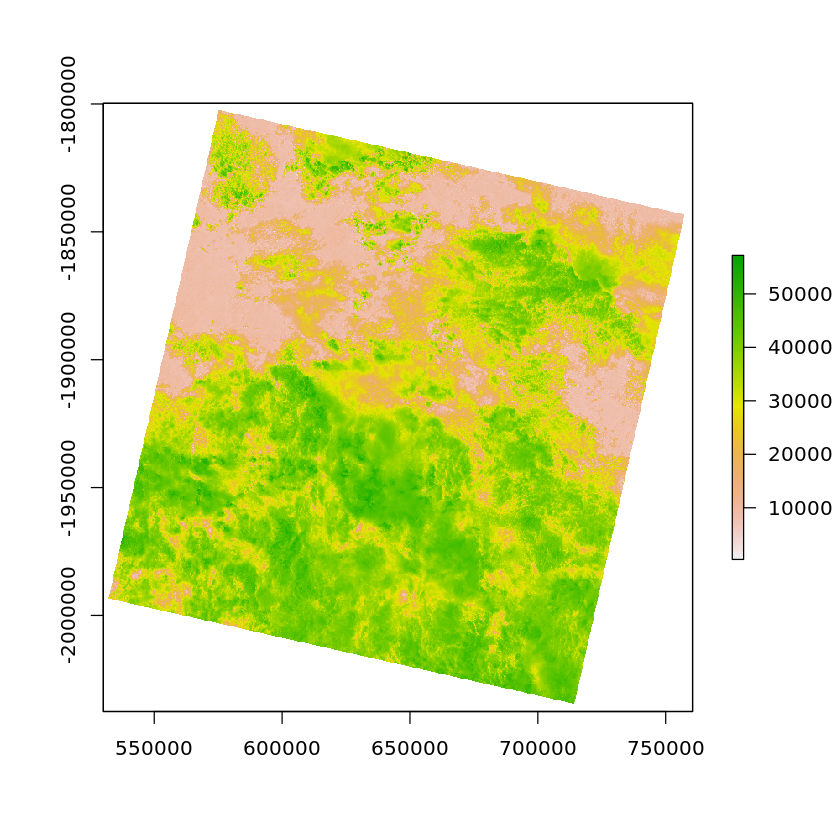

In [4]:
url <- paste0("/vsicurl/", it_obj$features[[1]]$assets$SR_B2$href)
data <- rast(url)
plot(data)

### Learn more

For more about the Planetary Computer's STAC API, see [Using tokens for data access](https://planetarycomputer.microsoft.com/docs/concepts/sas/) and the [STAC API reference](https://planetarycomputer.microsoft.com/docs/reference/stac/). For more about rstac, see [its documentation](https://rdrr.io/cran/rstac/).